In [5]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [15]:
!where python 


c:\Users\User\.conda\envs\python_course\python.exe
D:\THWS\mathe\python.exe
C:\Users\User\AppData\Local\Microsoft\WindowsApps\python.exe


In [1]:
pip show seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import sys
print(sys.executable)


c:\Users\User\.conda\envs\python_course\python.exe


In [2]:
import seaborn as sns
print(sns.__version__)


0.13.2


In [6]:
# Only get  data analyst jobs for in Germany 
df_DA_DE = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Germany')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_DE = df_DA_DE.dropna(subset=['salary_year_avg'])




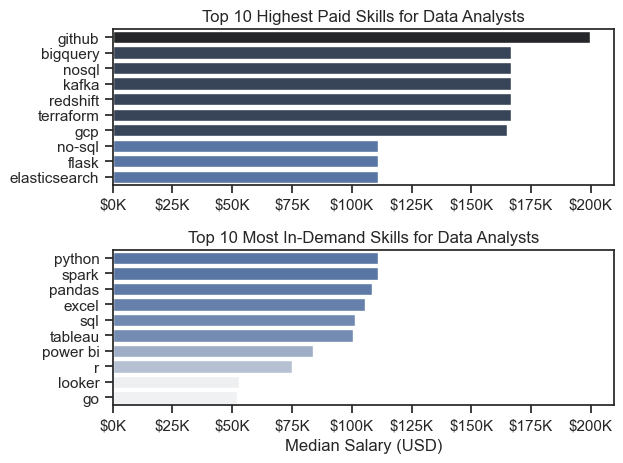

In [15]:
df_DA_DE = df_DA_DE.explode('job_skills')
df_DA_DE[['salary_year_avg', 'job_skills']]

df_DA_top_pay = df_DA_DE.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)


df_DA_skills = df_DA_DE.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

fig, ax = plt.subplots(2, 1)  

sns.set_theme(style='ticks')
# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 

 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

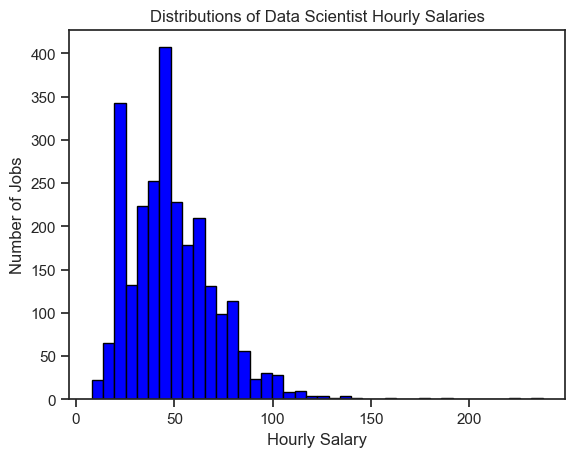

In [23]:
df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()
df_DS = df_DS.dropna(subset=['salary_hour_avg'])
df_DS['salary_hour_avg'].plot(kind='hist', bins = 40, color = 'blue', edgecolor = 'black' )

plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distributions of Data Scientist Hourly Salaries')
plt.show()


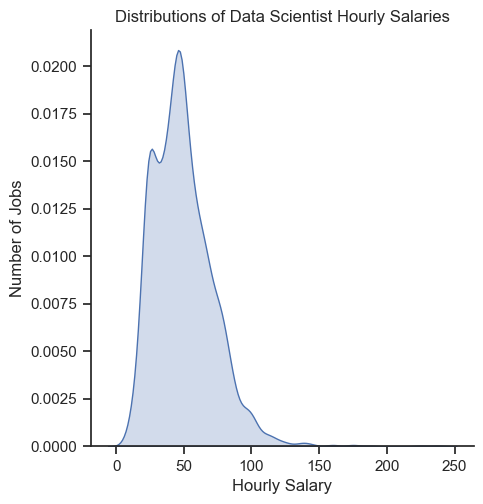

In [33]:
sns.displot(df_DS['salary_hour_avg'], kind='kde', common_norm=False, fill=True)
plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distributions of Data Scientist Hourly Salaries')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_19228\277354395.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


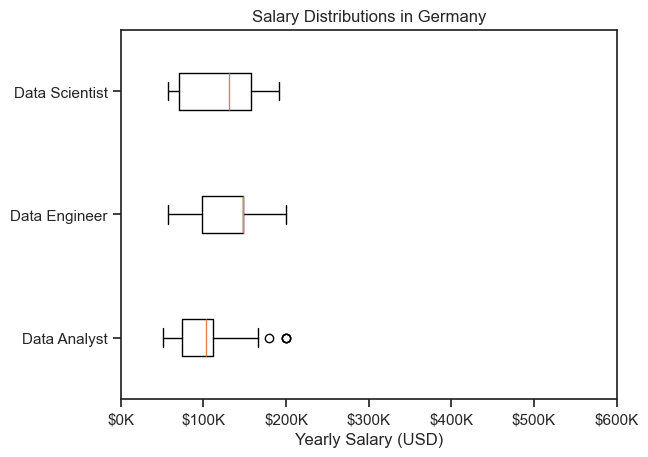

In [37]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter for the job titles and country 

df_DE = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'Germany')].dropna(subset=['salary_year_avg'])

# list of salaries for each job title 
job_list = [df_DE[df_DE['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distributions in Germany')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()


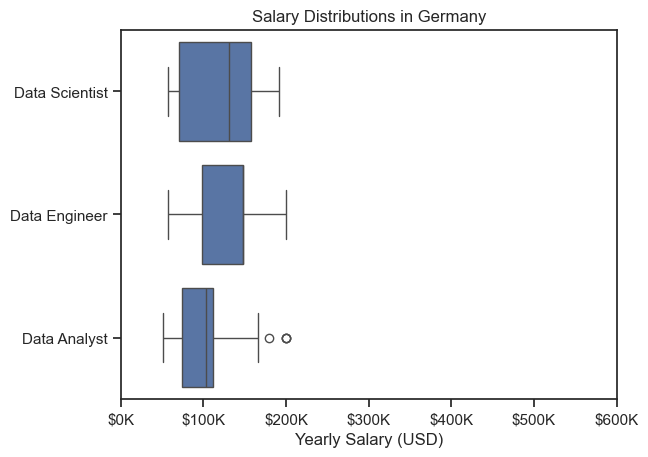

In [40]:
sns.boxplot(data=df_DE, x='salary_year_avg', y='job_title_short')

plt.title('Salary Distributions in Germany')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()


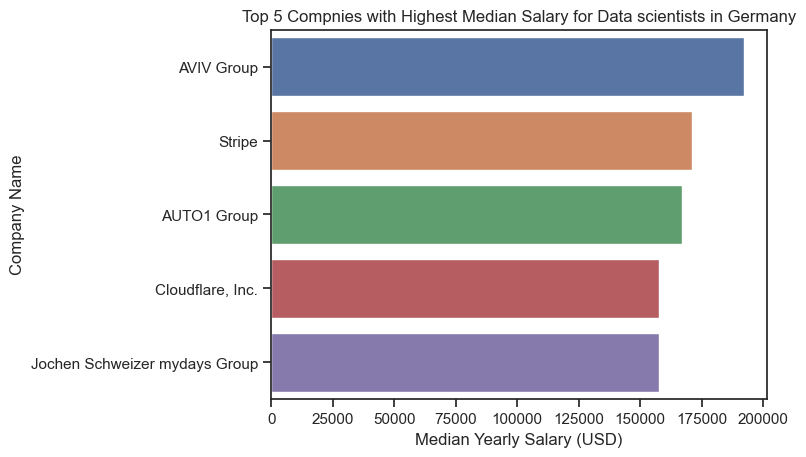

In [43]:
# Top Companies Bar Plot 

df_DS_DE = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'Germany')].dropna(subset=['salary_year_avg']).copy()
top_companies = df_DS_DE.groupby('company_name')['salary_year_avg'].median().nlargest(5).reset_index()

sns.barplot(data=top_companies,x='salary_year_avg', y='company_name', hue='company_name')
plt.title('Top 5 Compnies with Highest Median Salary for Data scientists in Germany')
plt.xlabel('Median Yearly Salary (USD)')
plt.ylabel('Company Name')
plt.show()


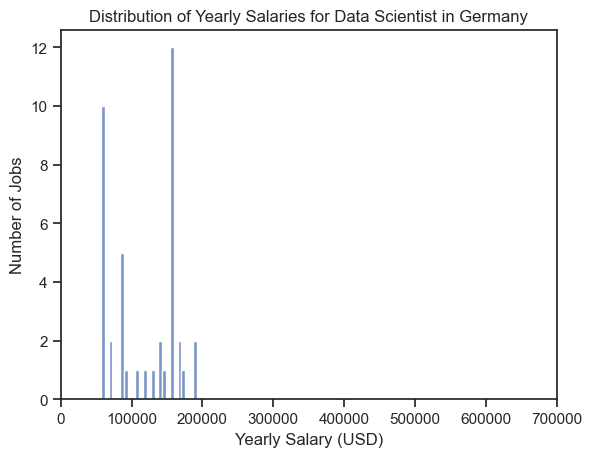

In [ ]:
# Data Scientist Salary Histogram
df_DS_DE = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'Germany')].dropna(subset=['salary_year_avg']).copy()

sns.histplot(df_DS_DE['salary_year_avg'], bins=25,  kde=False)
plt.xlim(0, 700000)
plt.title('Distribution of Yearly Salaries for Data Scientist in Germany')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
plt.show()



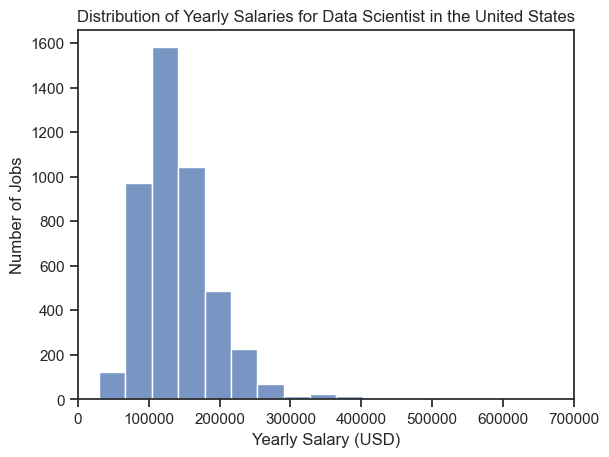

In [48]:
# Data Scientist Salary Histogram (For US)

us_ds_jobs = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Scientist')].copy()

# Drop NaN values from the 'salary_year_avg' column
us_ds_jobs = us_ds_jobs.dropna(subset=['salary_year_avg'])

# Plot histogram for yearly average salary
sns.histplot(us_ds_jobs['salary_year_avg'], bins=25, kde=False)
plt.title('Distribution of Yearly Salaries for Data Scientist in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
plt.xlim(0,700000)
plt.show()


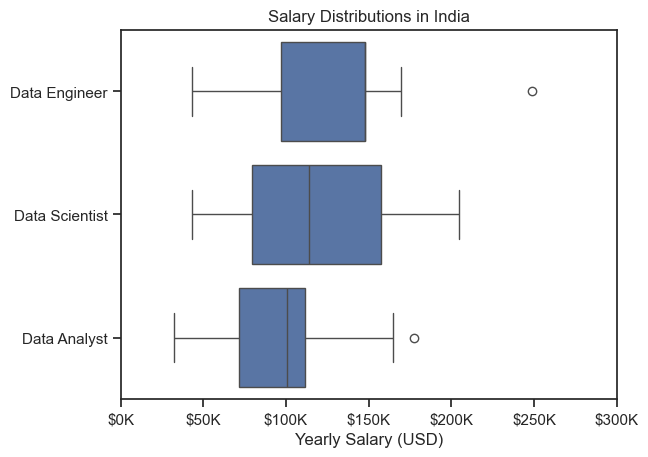

In [50]:
# Data Roles Salary Box Plot 

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_India = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'India')].dropna(subset=['salary_year_avg'])

# list of salaries for each job title 
job_list = [df_India[df_India['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]


sns.boxplot(data=df_India, x='salary_year_avg', y='job_title_short')

plt.title('Salary Distributions in India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 300000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

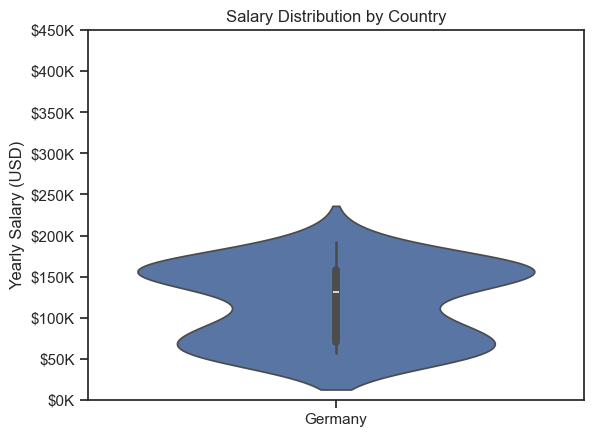

In [52]:
# Salary Distribution for Germany
df_DS_DE = df[(df['job_country'] == 'Germany') & (df['job_title_short'] == 'Data Scientist')].dropna(subset=['salary_year_avg']).copy()

sns.violinplot(data=df_DS_DE, x='job_country', y='salary_year_avg')
plt.ylim()
plt.title('Salary Distribution by Country')
plt.xlabel('')
plt.ylabel('Yearly Salary (USD)')
plt.ylim(0, 450000)  
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()